## Identifying Duplicate Questions

Over 100 million people visit Quora every month, so it's no surprise that many people ask similar (or the same) questions. Various questions with the same intent can cause people to spend extra time searching for the best answer to their question, and results in members answering multiple versions of the same question. Quora uses random forest to identify duplicated questions to provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
Follow the steps outlined below to build the appropriate classifier model. 


Steps:
- Download data
- Exploration
- Cleaning
- Feature Engineering
- Modeling

By the end of this project you should have **a presentation that describes the model you built** and its **performance**. 


In [113]:
import pandas as pd

In [114]:
df = pd.read_csv("train.csv")

#### Note
There is no designated test.csv file. The train.csv file is the entire dataset. Part of the data in the train.csv file should be set aside to act as the final testing data.

In [232]:
df.loc[df['is_duplicate']==1][100:150]

,id,qid1,qid2,question1,question2,is_duplicate
269,269,538,539,What are the rights of a prisoner?,"If I am in prison, what rights would I have?",1
270,270,540,541,How can I get free gems in Clash of Clans?,How can I get free gems Clash of Clans?,1
273,273,546,547,What is the best way to get traffic on your we...,How do i get traffic for website?,1
274,274,548,549,How do you feel when someone upvotes your answ...,How does it feel to see upvotes to your answer...,1
275,275,550,551,What are some of the best films and TV shows t...,What are the best female strong characters in ...,1
281,281,562,563,How long does it take for a dead body to float...,"When a dead body is in a river, how long does ...",1
284,284,568,569,How can I make money online with free of cost?,How do I to make money online?,1
285,285,570,571,Where can I buy best quality customized cupcak...,Where can I find delicious cupcakes at Gold Co...,1
286,286,572,573,How successful was odd even plan?,How successful was the Delhi's Odd-even plan?,1
287,287,574,575,If there will be a war between India and Pakis...,Who will win if a war starts between India and...,1


In [116]:
df.shape

(404290, 6)

In [117]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=1)

In [118]:
print(df_train.shape)
print(df_test.shape)

(303217, 6)
(101073, 6)


### Exploration

In [119]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
394617,394617,527528,527529,How can I become a CEO if my law school grades...,What's a good online discussion board where I ...,0
146735,146735,60120,231728,Can a Singapore citizen obtain another citizen...,"As an American, could I cross the Canadian bor...",0
231076,231076,340783,167045,How can you get rid of pimples in your earlobe?,How do you get rid of a pimple in your ear?,1
66117,66117,103992,26685,How will releasing new 500 and 2000 rupee note...,If PM Modi wants to curb black money? Why was ...,1
114046,114046,8431,89956,What are some possible solutions if I forgot m...,How do I get my iCloud password?,1


In [120]:
# What portion of our questions are actually duplicates?
df_train['is_duplicate'].value_counts()

0    191290
1    111927
Name: is_duplicate, dtype: int64

In [121]:
# Are we missing any data?
df_train.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [122]:
# Are there any duplicate rows?
df_train[df_train.duplicated()].sum()

id              0.0
qid1            0.0
qid2            0.0
question1       0.0
question2       0.0
is_duplicate    0.0
dtype: float64

In [123]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303217 entries, 394617 to 128037
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            303217 non-null  int64 
 1   qid1          303217 non-null  int64 
 2   qid2          303217 non-null  int64 
 3   question1     303217 non-null  object
 4   question2     303216 non-null  object
 5   is_duplicate  303217 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.2+ MB


### Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

In [124]:
df_train = df_train.dropna(axis=0)

In [125]:
df_train = df_train.loc[:,'question1':'is_duplicate'].reset_index(drop=True)
df_train.head()

,question1,question2,is_duplicate
0,How can I become a CEO if my law school grades...,What's a good online discussion board where I ...,0
1,Can a Singapore citizen obtain another citizen...,"As an American, could I cross the Canadian bor...",0
2,How can you get rid of pimples in your earlobe?,How do you get rid of a pimple in your ear?,1
3,How will releasing new 500 and 2000 rupee note...,If PM Modi wants to curb black money? Why was ...,1
4,What are some possible solutions if I forgot m...,How do I get my iCloud password?,1


In [126]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from nltk.stem import PorterStemmer
from sklearn.preprocessing import FunctionTransformer

def clean_all(text):

    # remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])

    # make lowercase
    text = text.lower()

    # remove stopwords  
    eng_stopwords = stopwords.words('English')
    text = [word for word in text.split() if word not in eng_stopwords]

    # lemmatize
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text])

    # stem
    ps = PorterStemmer()
    text = ''.join([ps.stem(word) for word in text])       

    return text

def tokenize(text):
    
    tokens = text.split()
    return tokens

# # Create a Transformer from the function so that we can use it in a Pipeline
# cleaner = FunctionTransformer(clean_all)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [127]:
df_train['question1_cleaned'] = df_train['question1'].apply(lambda x: clean_all(x))
df_train.head(10)

,question1,question2,is_duplicate,question1_cleaned
0,How can I become a CEO if my law school grades...,What's a good online discussion board where I ...,0,become ceo law school grade competitive
1,Can a Singapore citizen obtain another citizen...,"As an American, could I cross the Canadian bor...",0,singapore citizen obtain another citizenship b...
2,How can you get rid of pimples in your earlobe?,How do you get rid of a pimple in your ear?,1,get rid pimple earlobe
3,How will releasing new 500 and 2000 rupee note...,If PM Modi wants to curb black money? Why was ...,1,releasing new 500 2000 rupee note help eradica...
4,What are some possible solutions if I forgot m...,How do I get my iCloud password?,1,possible solution forgot icloud password
5,Are there any languages that use the same word...,Is it widespread for languages to use the same...,0,language use word iron steel
6,"My crush didn't accept my friend request, but ...",If my crush has not accepted my friend request...,0,crush didnt accept friend request accepted req...
7,Is Sun in bal awastha i.e at 0 degree in 9th h...,Is Sun in bal awastha i.e at 0 degree in 9th h...,1,sun bal awastha ie 0 degree 9th house sign leo...
8,Where can I buy Nestle Wonder Balls?,How good is Nestle Pure Life Water for you?,0,buy nestle wonder ball
9,How do I backup my pictures and music from my ...,How do I transfer music from iTunes to iPhone?,0,backup picture music iphone itunes


In [128]:
df_train['question1_cleaned_tokenized'] = df_train['question1_cleaned'].apply(lambda x: tokenize(x))
df_train.head()

,question1,question2,is_duplicate,question1_cleaned,question1_cleaned_tokenized
0,How can I become a CEO if my law school grades...,What's a good online discussion board where I ...,0,become ceo law school grade competitive,"[become, ceo, law, school, grade, competitive]"
1,Can a Singapore citizen obtain another citizen...,"As an American, could I cross the Canadian bor...",0,singapore citizen obtain another citizenship b...,"[singapore, citizen, obtain, another, citizens..."
2,How can you get rid of pimples in your earlobe?,How do you get rid of a pimple in your ear?,1,get rid pimple earlobe,"[get, rid, pimple, earlobe]"
3,How will releasing new 500 and 2000 rupee note...,If PM Modi wants to curb black money? Why was ...,1,releasing new 500 2000 rupee note help eradica...,"[releasing, new, 500, 2000, rupee, note, help,..."
4,What are some possible solutions if I forgot m...,How do I get my iCloud password?,1,possible solution forgot icloud password,"[possible, solution, forgot, icloud, password]"


In [129]:
df_train['question2_cleaned'] = df_train['question2'].apply(lambda x: clean_all(x))
df_train.head(10)

,question1,question2,is_duplicate,question1_cleaned,question1_cleaned_tokenized,question2_cleaned
0,How can I become a CEO if my law school grades...,What's a good online discussion board where I ...,0,become ceo law school grade competitive,"[become, ceo, law, school, grade, competitive]",whats good online discussion board air daily f...
1,Can a Singapore citizen obtain another citizen...,"As an American, could I cross the Canadian bor...",0,singapore citizen obtain another citizenship b...,"[singapore, citizen, obtain, another, citizens...",american could cross canadian border child chi...
2,How can you get rid of pimples in your earlobe?,How do you get rid of a pimple in your ear?,1,get rid pimple earlobe,"[get, rid, pimple, earlobe]",get rid pimple ear
3,How will releasing new 500 and 2000 rupee note...,If PM Modi wants to curb black money? Why was ...,1,releasing new 500 2000 rupee note help eradica...,"[releasing, new, 500, 2000, rupee, note, help,...",pm modi want curb black money new 2000 rupee n...
4,What are some possible solutions if I forgot m...,How do I get my iCloud password?,1,possible solution forgot icloud password,"[possible, solution, forgot, icloud, password]",get icloud password
5,Are there any languages that use the same word...,Is it widespread for languages to use the same...,0,language use word iron steel,"[language, use, word, iron, steel]",widespread language use word one
6,"My crush didn't accept my friend request, but ...",If my crush has not accepted my friend request...,0,crush didnt accept friend request accepted req...,"[crush, didnt, accept, friend, request, accept...",crush accepted friend request facebook mean do...
7,Is Sun in bal awastha i.e at 0 degree in 9th h...,Is Sun in bal awastha i.e at 0 degree in 9th h...,1,sun bal awastha ie 0 degree 9th house sign leo...,"[sun, bal, awastha, ie, 0, degree, 9th, house,...",sun bal awastha ie 0 degree 9th house sign leo...
8,Where can I buy Nestle Wonder Balls?,How good is Nestle Pure Life Water for you?,0,buy nestle wonder ball,"[buy, nestle, wonder, ball]",good nestle pure life water
9,How do I backup my pictures and music from my ...,How do I transfer music from iTunes to iPhone?,0,backup picture music iphone itunes,"[backup, picture, music, iphone, itunes]",transfer music itunes iphone


In [135]:
df_train['question2_cleaned_tokenized'] = df_train['question2_cleaned'].apply(lambda x: tokenize(x))
df_train.head()

,is_duplicate,question1_cleaned,question1_cleaned_tokenized,question2_cleaned,question2_cleaned_tokenized
0,0,become ceo law school grade competitive,"[become, ceo, law, school, grade, competitive]",whats good online discussion board air daily f...,"[whats, good, online, discussion, board, air, ..."
1,0,singapore citizen obtain another citizenship b...,"[singapore, citizen, obtain, another, citizens...",american could cross canadian border child chi...,"[american, could, cross, canadian, border, chi..."
2,1,get rid pimple earlobe,"[get, rid, pimple, earlobe]",get rid pimple ear,"[get, rid, pimple, ear]"
3,1,releasing new 500 2000 rupee note help eradica...,"[releasing, new, 500, 2000, rupee, note, help,...",pm modi want curb black money new 2000 rupee n...,"[pm, modi, want, curb, black, money, new, 2000..."
4,1,possible solution forgot icloud password,"[possible, solution, forgot, icloud, password]",get icloud password,"[get, icloud, password]"


In [136]:
df_train = df_train.loc[:,'is_duplicate':'question2_cleaned_tokenized']

In [137]:
df_train.head()

,is_duplicate,question1_cleaned,question1_cleaned_tokenized,question2_cleaned,question2_cleaned_tokenized
0,0,become ceo law school grade competitive,"[become, ceo, law, school, grade, competitive]",whats good online discussion board air daily f...,"[whats, good, online, discussion, board, air, ..."
1,0,singapore citizen obtain another citizenship b...,"[singapore, citizen, obtain, another, citizens...",american could cross canadian border child chi...,"[american, could, cross, canadian, border, chi..."
2,1,get rid pimple earlobe,"[get, rid, pimple, earlobe]",get rid pimple ear,"[get, rid, pimple, ear]"
3,1,releasing new 500 2000 rupee note help eradica...,"[releasing, new, 500, 2000, rupee, note, help,...",pm modi want curb black money new 2000 rupee n...,"[pm, modi, want, curb, black, money, new, 2000..."
4,1,possible solution forgot icloud password,"[possible, solution, forgot, icloud, password]",get icloud password,"[get, icloud, password]"


In [138]:
import pickle

# pickle.dump(df_train, open("df_train.pkl", "wb" ))

### Feature Engineering

- tf-idf
- word2vec
- word count
- number of the same words in both questions
- ....

In [139]:
df_train = pickle.load( open( "df_train.pkl", "rb" ) )

In [140]:
df_train.head()

,is_duplicate,question1_cleaned,question1_cleaned_tokenized,question2_cleaned,question2_cleaned_tokenized
0,0,become ceo law school grade competitive,"[become, ceo, law, school, grade, competitive]",whats good online discussion board air daily f...,"[whats, good, online, discussion, board, air, ..."
1,0,singapore citizen obtain another citizenship b...,"[singapore, citizen, obtain, another, citizens...",american could cross canadian border child chi...,"[american, could, cross, canadian, border, chi..."
2,1,get rid pimple earlobe,"[get, rid, pimple, earlobe]",get rid pimple ear,"[get, rid, pimple, ear]"
3,1,releasing new 500 2000 rupee note help eradica...,"[releasing, new, 500, 2000, rupee, note, help,...",pm modi want curb black money new 2000 rupee n...,"[pm, modi, want, curb, black, money, new, 2000..."
4,1,possible solution forgot icloud password,"[possible, solution, forgot, icloud, password]",get icloud password,"[get, icloud, password]"


In [195]:
import sys
import os
from sklearn.metrics import confusion_matrix

# adding python_functions subfolder to the system path
var = os.environ['PYTHONPATH']
sys.path.insert(0, var)
    
# importing the make_confusion_matrix
from confusion_matrix import make_confusion_matrix
# (refer to https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea for code)

# Feature 1 - Cosine Similarity of TfidfVectorized Questions

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
Document1 = df_train['question1_cleaned']
Document2 = df_train['question2_cleaned']

corpus = pd.concat([Document1, Document2])

corpus
vectorizer.fit(corpus)

vec_question1_train = vectorizer.transform(Document1)
vec_question2_train = vectorizer.transform(Document2)

cos_sim_lst = []

from sklearn.metrics.pairwise import cosine_similarity

for i in range(len(df_train)):
       
        cos_sim_lst.append(cosine_similarity(vec_question1_train[i], vec_question2_train[i]))

In [231]:
vec_question1_train[0]

<1x86367 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [72]:
# pickle.dump(cos_sim_lst, open("cos_sim_lst_tfidf.pkl", "wb" ))

In [141]:
cos_sim_lst = pickle.load( open( "cos_sim_lst_tfidf.pkl", "rb" ) )

In [142]:
cos_sim_list_new = []

for i in range(len(cos_sim_lst)):
    
    lst = cos_sim_lst[i][0].tolist()
    cos_sim_list_new.append(lst[0])

In [143]:
df_train['tfidf_cos_sim'] = cos_sim_list_new

In [144]:
df_train.head()

,is_duplicate,question1_cleaned,question1_cleaned_tokenized,question2_cleaned,question2_cleaned_tokenized,tfidf_cos_sim
0,0,become ceo law school grade competitive,"[become, ceo, law, school, grade, competitive]",whats good online discussion board air daily f...,"[whats, good, online, discussion, board, air, ...",0.000000
1,0,singapore citizen obtain another citizenship b...,"[singapore, citizen, obtain, another, citizens...",american could cross canadian border child chi...,"[american, could, cross, canadian, border, chi...",0.200881
2,1,get rid pimple earlobe,"[get, rid, pimple, earlobe]",get rid pimple ear,"[get, rid, pimple, ear]",0.584816
3,1,releasing new 500 2000 rupee note help eradica...,"[releasing, new, 500, 2000, rupee, note, help,...",pm modi want curb black money new 2000 rupee n...,"[pm, modi, want, curb, black, money, new, 2000...",0.415588
4,1,possible solution forgot icloud password,"[possible, solution, forgot, icloud, password]",get icloud password,"[get, icloud, password]",0.628217


In [145]:
pickle.dump(df_train, open("df_train_feature1.pkl", "wb" ))

In [196]:
df_train = pickle.load( open( "df_train_feature1.pkl", "rb" ) )

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df_train[['tfidf_cos_sim']], df_train['is_duplicate'].astype('int'), test_size=0.20, random_state=1)

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [198]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [199]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_pred_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Training set accuracy: {:.2f}%".format(accuracy_train * 100))
print("Test set accuracy: {:.2f}%".format(accuracy_test * 100))

Training set accuracy: 100.00%
Test set accuracy: 66.68%


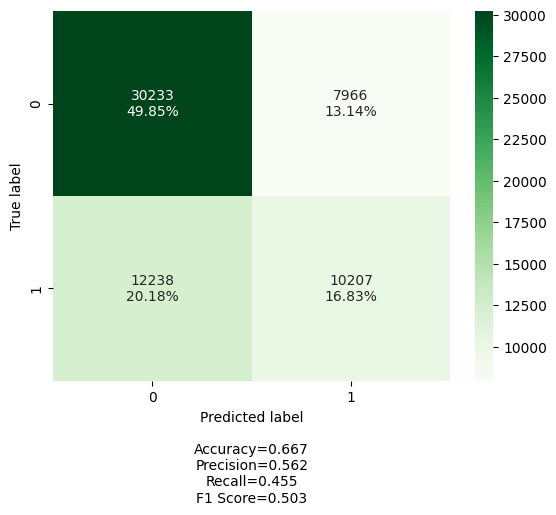

In [200]:
cf_matrix = confusion_matrix(y_test, y_pred_test)

# calling make_confusion_matrix function
result = make_confusion_matrix(cf_matrix, cmap = 'Greens')

In [201]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_pred_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Training set accuracy: {:.2f}%".format(accuracy_train * 100))
print("Test set accuracy: {:.2f}%".format(accuracy_test * 100))

Training set accuracy: 100.00%
Test set accuracy: 67.54%


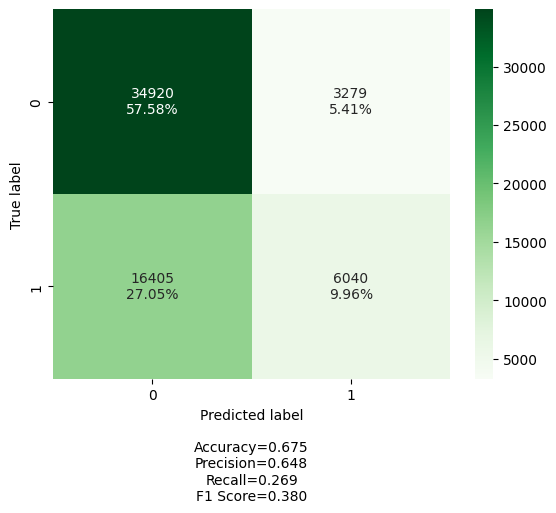

In [202]:
cf_matrix = confusion_matrix(y_test, y_pred_test)

result = make_confusion_matrix(cf_matrix, cmap = 'Greens')

In [204]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=2)

model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_pred_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Training set accuracy: {:.2f}%".format(accuracy_train * 100))
print("Test set accuracy: {:.2f}%".format(accuracy_test * 100))

Training set accuracy: 100.00%
Test set accuracy: 67.34%


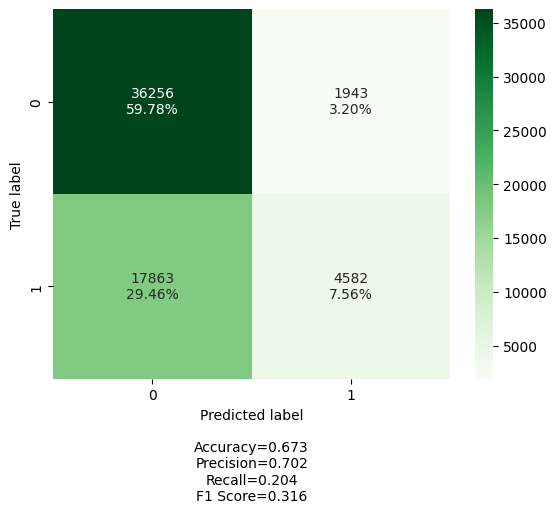

In [205]:
cf_matrix = confusion_matrix(y_test, y_pred_test)

result = make_confusion_matrix(cf_matrix, cmap = 'Greens')

# Feature 2 - Count of Words Common to both Questions

In [146]:
df_train = pickle.load( open( "df_train_feature1.pkl", "rb" ) )

In [147]:
df_train.head()

,is_duplicate,question1_cleaned,question1_cleaned_tokenized,question2_cleaned,question2_cleaned_tokenized,tfidf_cos_sim
0,0,become ceo law school grade competitive,"[become, ceo, law, school, grade, competitive]",whats good online discussion board air daily f...,"[whats, good, online, discussion, board, air, ...",0.000000
1,0,singapore citizen obtain another citizenship b...,"[singapore, citizen, obtain, another, citizens...",american could cross canadian border child chi...,"[american, could, cross, canadian, border, chi...",0.200881
2,1,get rid pimple earlobe,"[get, rid, pimple, earlobe]",get rid pimple ear,"[get, rid, pimple, ear]",0.584816
3,1,releasing new 500 2000 rupee note help eradica...,"[releasing, new, 500, 2000, rupee, note, help,...",pm modi want curb black money new 2000 rupee n...,"[pm, modi, want, curb, black, money, new, 2000...",0.415588
4,1,possible solution forgot icloud password,"[possible, solution, forgot, icloud, password]",get icloud password,"[get, icloud, password]",0.628217


In [148]:
# used code from here: https://stackoverflow.com/questions/49796271/find-intersection-of-two-columns-in-python-pandas-list-of-strings

df_train['common_words'] = [len(set(a).intersection(b)) for a, b in zip(df_train['question1_cleaned_tokenized'], df_train['question2_cleaned_tokenized'])]

In [149]:
df_train.head()

,is_duplicate,question1_cleaned,question1_cleaned_tokenized,question2_cleaned,question2_cleaned_tokenized,tfidf_cos_sim,common_words
0,0,become ceo law school grade competitive,"[become, ceo, law, school, grade, competitive]",whats good online discussion board air daily f...,"[whats, good, online, discussion, board, air, ...",0.000000,0
1,0,singapore citizen obtain another citizenship b...,"[singapore, citizen, obtain, another, citizens...",american could cross canadian border child chi...,"[american, could, cross, canadian, border, chi...",0.200881,2
2,1,get rid pimple earlobe,"[get, rid, pimple, earlobe]",get rid pimple ear,"[get, rid, pimple, ear]",0.584816,3
3,1,releasing new 500 2000 rupee note help eradica...,"[releasing, new, 500, 2000, rupee, note, help,...",pm modi want curb black money new 2000 rupee n...,"[pm, modi, want, curb, black, money, new, 2000...",0.415588,6
4,1,possible solution forgot icloud password,"[possible, solution, forgot, icloud, password]",get icloud password,"[get, icloud, password]",0.628217,2


In [150]:
pickle.dump(df_train, open("df_train_feature2.pkl", "wb" ))

In [206]:
df_train = pickle.load( open( "df_train_feature2.pkl", "rb" ) )

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessing_pipeline = Pipeline(steps=[
    ('scale',StandardScaler())
])

pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline), 
    ('model', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(df_train[['tfidf_cos_sim','common_words']], df_train['is_duplicate'].astype('int'), test_size=0.20, random_state=1)

pipeline.fit(X_train, y_train)
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

print(f'Train accuracy:\t{train_accuracy}')
print(f'Test accuracy:\t{test_accuracy}')


Train accuracy:	0.6681232788615339
Test accuracy:	0.6679803443044654


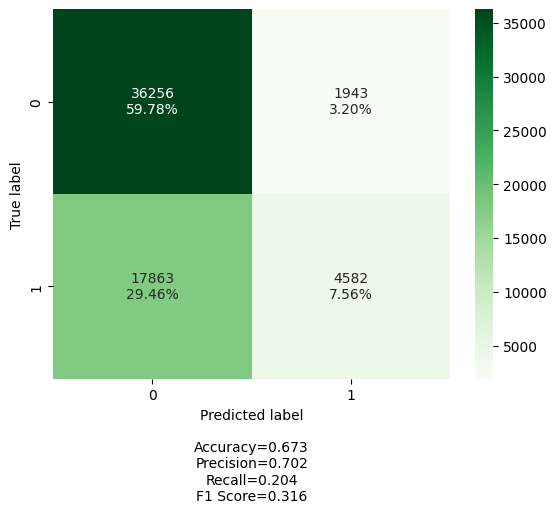

In [208]:
cf_matrix = confusion_matrix(y_test, y_pred_test)

result = make_confusion_matrix(cf_matrix, cmap = 'Greens')

In [209]:
from sklearn.ensemble import GradientBoostingClassifier

preprocessing_pipeline = Pipeline(steps=[
    ('scale',StandardScaler())
])

pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline), 
    ('model', GradientBoostingClassifier())
])

X_train, X_test, y_train, y_test = train_test_split(df_train[['tfidf_cos_sim','common_words']], df_train['is_duplicate'].astype('int'), test_size=0.20, random_state=1)

pipeline.fit(X_train, y_train)
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

print(f'Train accuracy:\t{train_accuracy}')
print(f'Test accuracy:\t{test_accuracy}')

Train accuracy:	0.6953976551291987
Test accuracy:	0.6924345359804762


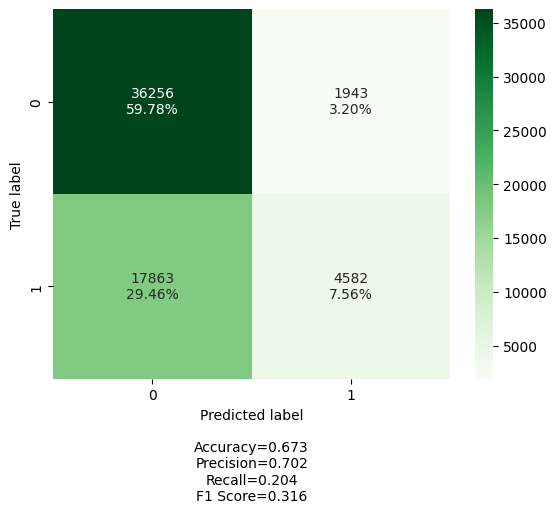

In [210]:
cf_matrix = confusion_matrix(y_test, y_pred_test)

result = make_confusion_matrix(cf_matrix, cmap = 'Greens')

In [211]:
from sklearn.ensemble import RandomForestClassifier

preprocessing_pipeline = Pipeline(steps=[
    ('scale',StandardScaler())
])

pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline), 
    ('model', RandomForestClassifier(max_depth=2))
])

X_train, X_test, y_train, y_test = train_test_split(df_train[['tfidf_cos_sim','common_words']], df_train['is_duplicate'].astype('int'), test_size=0.20, random_state=1)

pipeline.fit(X_train, y_train)
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

print(f'Train accuracy:\t{train_accuracy}')
print(f'Test accuracy:\t{test_accuracy}')

Train accuracy:	0.6736762693138532
Test accuracy:	0.6734219378668953


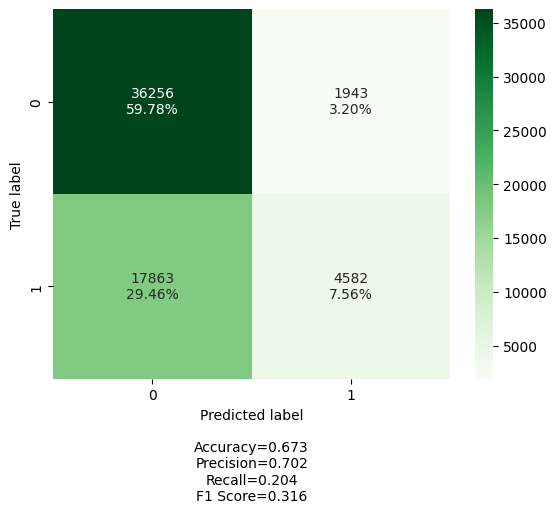

In [212]:
cf_matrix = confusion_matrix(y_test, y_pred_test)

result = make_confusion_matrix(cf_matrix, cmap = 'Greens')

# Feature 3 - Count of Words in Each Question

In [151]:
df_train = pickle.load( open( "df_train_feature2.pkl", "rb" ) )

In [152]:
df_train.head()

,is_duplicate,question1_cleaned,question1_cleaned_tokenized,question2_cleaned,question2_cleaned_tokenized,tfidf_cos_sim,common_words
0,0,become ceo law school grade competitive,"[become, ceo, law, school, grade, competitive]",whats good online discussion board air daily f...,"[whats, good, online, discussion, board, air, ...",0.000000,0
1,0,singapore citizen obtain another citizenship b...,"[singapore, citizen, obtain, another, citizens...",american could cross canadian border child chi...,"[american, could, cross, canadian, border, chi...",0.200881,2
2,1,get rid pimple earlobe,"[get, rid, pimple, earlobe]",get rid pimple ear,"[get, rid, pimple, ear]",0.584816,3
3,1,releasing new 500 2000 rupee note help eradica...,"[releasing, new, 500, 2000, rupee, note, help,...",pm modi want curb black money new 2000 rupee n...,"[pm, modi, want, curb, black, money, new, 2000...",0.415588,6
4,1,possible solution forgot icloud password,"[possible, solution, forgot, icloud, password]",get icloud password,"[get, icloud, password]",0.628217,2


In [154]:
df_train['question1_word_count'] = df_train['question1_cleaned_tokenized'].apply(lambda x: len(x))
df_train['question2_word_count'] = df_train['question2_cleaned_tokenized'].apply(lambda x: len(x))
df_train.head()

,is_duplicate,question1_cleaned,question1_cleaned_tokenized,question2_cleaned,question2_cleaned_tokenized,tfidf_cos_sim,common_words,question1_word_count,question2_word_count
0,0,become ceo law school grade competitive,"[become, ceo, law, school, grade, competitive]",whats good online discussion board air daily f...,"[whats, good, online, discussion, board, air, ...",0.000000,0,6,8
1,0,singapore citizen obtain another citizenship b...,"[singapore, citizen, obtain, another, citizens...",american could cross canadian border child chi...,"[american, could, cross, canadian, border, chi...",0.200881,2,12,9
2,1,get rid pimple earlobe,"[get, rid, pimple, earlobe]",get rid pimple ear,"[get, rid, pimple, ear]",0.584816,3,4,4
3,1,releasing new 500 2000 rupee note help eradica...,"[releasing, new, 500, 2000, rupee, note, help,...",pm modi want curb black money new 2000 rupee n...,"[pm, modi, want, curb, black, money, new, 2000...",0.415588,6,10,11
4,1,possible solution forgot icloud password,"[possible, solution, forgot, icloud, password]",get icloud password,"[get, icloud, password]",0.628217,2,5,3


In [235]:
df_train[df_train['question1_cleaned'].isin(['Bermuda Triangle'])]

,is_duplicate,question1_cleaned,question1_cleaned_tokenized,question2_cleaned,question2_cleaned_tokenized,tfidf_cos_sim,common_words,question1_word_count,question2_word_count


In [158]:
# pickle.dump(df_train, open("df_train_feature3.pkl", "wb" ))

In [236]:
df_train = pickle.load( open( "df_train_feature3.pkl", "rb" ) )

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessing_pipeline = Pipeline(steps=[
    ('scale',StandardScaler())
])

pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline), 
    ('model', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(df_train[['tfidf_cos_sim','common_words','question1_word_count','question2_word_count']], df_train['is_duplicate'].astype('int'), test_size=0.20, random_state=1)

pipeline.fit(X_train, y_train)

# PREDICT
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# EVALUATE
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

compare_train = pd.concat([y_train, pd.Series(y_train_pred)], axis=1)
compare_test = pd.concat([y_test, pd.Series(y_test_pred)], axis=1)

compare_train = compare_train.rename(columns={compare_train.columns[0]: 'y_train', 
                                    compare_train.columns[1]: 'y_train_pred',
                                    })
compare_test = compare_test.rename(columns={compare_test.columns[0]: 'y_test', 
                                    compare_test.columns[1]: 'y_test_pred',
                                    })

# calculations to get precision and recall
TP_train = len(compare_train.loc[(compare_train['y_train']==compare_train['y_train_pred'])&(compare_train['y_train_pred']==1)])
FP_train = len(compare_train.loc[(compare_train['y_train']!=compare_train['y_train_pred'])&(compare_train['y_train_pred']==1)])
FN_train = len(compare_train.loc[(compare_train['y_train']!=compare_train['y_train_pred'])&(compare_train['y_train_pred']==0)])

TP_test = len(compare_test.loc[(compare_test['y_test']==compare_test['y_test_pred'])&(compare_test['y_test_pred']==1)])
FP_test = len(compare_test.loc[(compare_test['y_test']!=compare_test['y_test_pred'])&(compare_test['y_test_pred']==1)])
FN_test = len(compare_test.loc[(compare_test['y_test']!=compare_test['y_test_pred'])&(compare_test['y_test_pred']==0)])

acc_train = pipeline.score(X_train, y_train)
precision_train = TP_train/(TP_train+FP_train)
recall_train = TP_train/(TP_train+FN_train)

acc_test = pipeline.score(X_test, y_test)
precision_test = TP_test/(TP_test+FP_test)
recall_test = TP_test/(TP_test+FN_test)

print(f'Train Accuracy:\t{acc_train}')
print(f'Train Precision:\t{precision_train}')
print(f'Train Recall:\t{recall_train}')
print(f'Test Accuracy:\t{acc_test}')
print(f'Test Precision:\t{precision_test}')
print(f'Test Recall:\t{recall_test}')


Train Accuracy:	0.6661527299111192
Train Precision:	0.555690961029431
Train Recall:	0.47391654187434346
Test Accuracy:	0.6662159488160412
Test Precision:	0.5575165787687327
Test Recall:	0.47569614613499667


In [223]:
from sklearn.ensemble import GradientBoostingClassifier

preprocessing_pipeline = Pipeline(steps=[
    ('scale',StandardScaler())
])

pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline), 
    ('model', GradientBoostingClassifier())
])

X_train, X_test, y_train, y_test = train_test_split(df_train[['tfidf_cos_sim','common_words','question1_word_count','question2_word_count']], df_train['is_duplicate'].astype('int'), test_size=0.20, random_state=1)

pipeline.fit(X_train, y_train)

# PREDICT
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# EVALUATE
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

compare_train = pd.concat([y_train, pd.Series(y_train_pred)], axis=1)
compare_test = pd.concat([y_test, pd.Series(y_test_pred)], axis=1)

compare_train = compare_train.rename(columns={compare_train.columns[0]: 'y_train', 
                                    compare_train.columns[1]: 'y_train_pred',
                                    })
compare_test = compare_test.rename(columns={compare_test.columns[0]: 'y_test', 
                                    compare_test.columns[1]: 'y_test_pred',
                                    })

# calculations to get precision and recall
TP_train = len(compare_train.loc[(compare_train['y_train']==compare_train['y_train_pred'])&(compare_train['y_train_pred']==1)])
FP_train = len(compare_train.loc[(compare_train['y_train']!=compare_train['y_train_pred'])&(compare_train['y_train_pred']==1)])
FN_train = len(compare_train.loc[(compare_train['y_train']!=compare_train['y_train_pred'])&(compare_train['y_train_pred']==0)])

TP_test = len(compare_test.loc[(compare_test['y_test']==compare_test['y_test_pred'])&(compare_test['y_test_pred']==1)])
FP_test = len(compare_test.loc[(compare_test['y_test']!=compare_test['y_test_pred'])&(compare_test['y_test_pred']==1)])
FN_test = len(compare_test.loc[(compare_test['y_test']!=compare_test['y_test_pred'])&(compare_test['y_test_pred']==0)])

acc_train = pipeline.score(X_train, y_train)
precision_train = TP_train/(TP_train+FP_train)
recall_train = TP_train/(TP_train+FN_train)

acc_test = pipeline.score(X_test, y_test)
precision_test = TP_test/(TP_test+FP_test)
recall_test = TP_test/(TP_test+FN_test)

print(f'Train Accuracy:\t{acc_train}')
print(f'Train Precision:\t{precision_train}')
print(f'Train Recall:\t{recall_train}')
print(f'Test Accuracy:\t{acc_test}')
print(f'Test Precision:\t{precision_test}')
print(f'Test Recall:\t{recall_test}')

Train Accuracy:	0.6977804528140099
Train Precision:	0.5977916455022616
Train Recall:	0.552390424889922
Test Accuracy:	0.6973979288965108
Test Precision:	0.5983378170637971
Test Recall:	0.5549120071285364


In [241]:
from sklearn.ensemble import GradientBoostingClassifier

preprocessing_pipeline = Pipeline(steps=[
    ('scale',StandardScaler())
])

pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline), 
    ('model', GradientBoostingClassifier(n_estimators=1000, learning_rate=0.05, n_iter_no_change=5))
])

X_train, X_test, y_train, y_test = train_test_split(df_train[['tfidf_cos_sim','common_words','question1_word_count','question2_word_count']], df_train['is_duplicate'].astype('int'), test_size=0.20, random_state=1)

pipeline.fit(X_train, y_train)

# PREDICT
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# EVALUATE
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

compare_train = pd.concat([y_train, pd.Series(y_train_pred)], axis=1)
compare_test = pd.concat([y_test, pd.Series(y_test_pred)], axis=1)

compare_train = compare_train.rename(columns={compare_train.columns[0]: 'y_train', 
                                    compare_train.columns[1]: 'y_train_pred',
                                    })
compare_test = compare_test.rename(columns={compare_test.columns[0]: 'y_test', 
                                    compare_test.columns[1]: 'y_test_pred',
                                    })

# calculations to get precision and recall
TP_train = len(compare_train.loc[(compare_train['y_train']==compare_train['y_train_pred'])&(compare_train['y_train_pred']==1)])
FP_train = len(compare_train.loc[(compare_train['y_train']!=compare_train['y_train_pred'])&(compare_train['y_train_pred']==1)])
FN_train = len(compare_train.loc[(compare_train['y_train']!=compare_train['y_train_pred'])&(compare_train['y_train_pred']==0)])

TP_test = len(compare_test.loc[(compare_test['y_test']==compare_test['y_test_pred'])&(compare_test['y_test_pred']==1)])
FP_test = len(compare_test.loc[(compare_test['y_test']!=compare_test['y_test_pred'])&(compare_test['y_test_pred']==1)])
FN_test = len(compare_test.loc[(compare_test['y_test']!=compare_test['y_test_pred'])&(compare_test['y_test_pred']==0)])

acc_train = pipeline.score(X_train, y_train)
precision_train = TP_train/(TP_train+FP_train)
recall_train = TP_train/(TP_train+FN_train)

acc_test = pipeline.score(X_test, y_test)
precision_test = TP_test/(TP_test+FP_test)
recall_test = TP_test/(TP_test+FN_test)

print(f'Train Accuracy:\t{acc_train}')
print(f'Train Precision:\t{precision_train}')
print(f'Train Recall:\t{recall_train}')
print(f'Test Accuracy:\t{acc_test}')
print(f'Test Precision:\t{precision_test}')
print(f'Test Recall:\t{recall_test}')

Train Accuracy:	0.7018452253351583
Train Precision:	0.6074793284891005
Train Recall:	0.5418855188753046
Test Accuracy:	0.7004155398720401
Test Precision:	0.6064618907751282
Test Recall:	0.5427489418578748


In [242]:
from sklearn.ensemble import GradientBoostingClassifier

preprocessing_pipeline = Pipeline(steps=[
    ('scale',StandardScaler())
])

pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline), 
    ('model', GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, n_iter_no_change=5))
])

X_train, X_test, y_train, y_test = train_test_split(df_train[['tfidf_cos_sim','common_words','question1_word_count','question2_word_count']], df_train['is_duplicate'].astype('int'), test_size=0.20, random_state=1)

pipeline.fit(X_train, y_train)

# PREDICT
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# EVALUATE
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

compare_train = pd.concat([y_train, pd.Series(y_train_pred)], axis=1)
compare_test = pd.concat([y_test, pd.Series(y_test_pred)], axis=1)

compare_train = compare_train.rename(columns={compare_train.columns[0]: 'y_train', 
                                    compare_train.columns[1]: 'y_train_pred',
                                    })
compare_test = compare_test.rename(columns={compare_test.columns[0]: 'y_test', 
                                    compare_test.columns[1]: 'y_test_pred',
                                    })

# calculations to get precision and recall
TP_train = len(compare_train.loc[(compare_train['y_train']==compare_train['y_train_pred'])&(compare_train['y_train_pred']==1)])
FP_train = len(compare_train.loc[(compare_train['y_train']!=compare_train['y_train_pred'])&(compare_train['y_train_pred']==1)])
FN_train = len(compare_train.loc[(compare_train['y_train']!=compare_train['y_train_pred'])&(compare_train['y_train_pred']==0)])

TP_test = len(compare_test.loc[(compare_test['y_test']==compare_test['y_test_pred'])&(compare_test['y_test_pred']==1)])
FP_test = len(compare_test.loc[(compare_test['y_test']!=compare_test['y_test_pred'])&(compare_test['y_test_pred']==1)])
FN_test = len(compare_test.loc[(compare_test['y_test']!=compare_test['y_test_pred'])&(compare_test['y_test_pred']==0)])

acc_train = pipeline.score(X_train, y_train)
precision_train = TP_train/(TP_train+FP_train)
recall_train = TP_train/(TP_train+FN_train)

acc_test = pipeline.score(X_test, y_test)
precision_test = TP_test/(TP_test+FP_test)
recall_test = TP_test/(TP_test+FN_test)

print(f'Train Accuracy:\t{acc_train}')
print(f'Train Precision:\t{precision_train}')
print(f'Train Recall:\t{recall_train}')
print(f'Test Accuracy:\t{acc_test}')
print(f'Test Precision:\t{precision_test}')
print(f'Test Recall:\t{recall_test}')

Train Accuracy:	0.6971497122503834
Train Precision:	0.5990282019262868
Train Recall:	0.5414496770300172
Test Accuracy:	0.6961776927643295
Test Precision:	0.5988200589970502
Test Recall:	0.5426598351525952


In [224]:
from sklearn.ensemble import RandomForestClassifier

preprocessing_pipeline = Pipeline(steps=[
    ('scale',StandardScaler())
])

pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline), 
    ('model', RandomForestClassifier(max_depth=2))
])

X_train, X_test, y_train, y_test = train_test_split(df_train[['tfidf_cos_sim','common_words','question1_word_count','question2_word_count']], df_train['is_duplicate'].astype('int'), test_size=0.20, random_state=1)

pipeline.fit(X_train, y_train)

# PREDICT
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# EVALUATE
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

compare_train = pd.concat([y_train, pd.Series(y_train_pred)], axis=1)
compare_test = pd.concat([y_test, pd.Series(y_test_pred)], axis=1)

compare_train = compare_train.rename(columns={compare_train.columns[0]: 'y_train', 
                                    compare_train.columns[1]: 'y_train_pred',
                                    })
compare_test = compare_test.rename(columns={compare_test.columns[0]: 'y_test', 
                                    compare_test.columns[1]: 'y_test_pred',
                                    })

# calculations to get precision and recall
TP_train = len(compare_train.loc[(compare_train['y_train']==compare_train['y_train_pred'])&(compare_train['y_train_pred']==1)])
FP_train = len(compare_train.loc[(compare_train['y_train']!=compare_train['y_train_pred'])&(compare_train['y_train_pred']==1)])
FN_train = len(compare_train.loc[(compare_train['y_train']!=compare_train['y_train_pred'])&(compare_train['y_train_pred']==0)])

TP_test = len(compare_test.loc[(compare_test['y_test']==compare_test['y_test_pred'])&(compare_test['y_test_pred']==1)])
FP_test = len(compare_test.loc[(compare_test['y_test']!=compare_test['y_test_pred'])&(compare_test['y_test_pred']==1)])
FN_test = len(compare_test.loc[(compare_test['y_test']!=compare_test['y_test_pred'])&(compare_test['y_test_pred']==0)])

acc_train = pipeline.score(X_train, y_train)
precision_train = TP_train/(TP_train+FP_train)
recall_train = TP_train/(TP_train+FN_train)

acc_test = pipeline.score(X_test, y_test)
precision_test = TP_test/(TP_test+FP_test)
recall_test = TP_test/(TP_test+FN_test)

print(f'Train Accuracy:\t{acc_train}')
print(f'Train Precision:\t{precision_train}')
print(f'Train Recall:\t{recall_train}')
print(f'Test Accuracy:\t{acc_test}')
print(f'Test Precision:\t{precision_test}')
print(f'Test Recall:\t{recall_test}')

Train Accuracy:	0.6745997064789011
Train Precision:	0.7131886342508387
Train Recall:	0.19719049641268635
Test Accuracy:	0.6738341798034431
Test Precision:	0.716350056827407
Test Recall:	0.19656939184673647


# Feature 3 - Word2Vec

In [159]:
df_train = pickle.load( open( "df_train_feature3.pkl", "rb" ) )

In [174]:
df_train.head()

,is_duplicate,question1_cleaned,question1_cleaned_tokenized,question2_cleaned,question2_cleaned_tokenized,tfidf_cos_sim,common_words,question1_word_count,question2_word_count
0,0,become ceo law school grade competitive,"[become, ceo, law, school, grade, competitive]",whats good online discussion board air daily f...,"[whats, good, online, discussion, board, air, ...",0.000000,0,6,8
1,0,singapore citizen obtain another citizenship b...,"[singapore, citizen, obtain, another, citizens...",american could cross canadian border child chi...,"[american, could, cross, canadian, border, chi...",0.200881,2,12,9
2,1,get rid pimple earlobe,"[get, rid, pimple, earlobe]",get rid pimple ear,"[get, rid, pimple, ear]",0.584816,3,4,4
3,1,releasing new 500 2000 rupee note help eradica...,"[releasing, new, 500, 2000, rupee, note, help,...",pm modi want curb black money new 2000 rupee n...,"[pm, modi, want, curb, black, money, new, 2000...",0.415588,6,10,11
4,1,possible solution forgot icloud password,"[possible, solution, forgot, icloud, password]",get icloud password,"[get, icloud, password]",0.628217,2,5,3


In [186]:
from sklearn.model_selection import train_test_split

sentences = df_train[['question1_cleaned','question2_cleaned']].values
y = df_train['is_duplicate'].values

# sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
sentences

array([['become ceo law school grade competitive',
        'whats good online discussion board air daily frustration'],
       ['singapore citizen obtain another citizenship become dual national would government singapore know',
        'american could cross canadian border child child dual citizen'],
       ['get rid pimple earlobe', 'get rid pimple ear'],
       ...,
       ['effect brace hearing', 'effect brace'],
       ['amazing photograph ever taken',
        'amazing photograph ever taken india'],
       ['best strategy netherlands defeat argentina 2014 world cup semifinal match',
        'best strategy argentina defeat netherlands 2014 world cup semifinal match']],
      dtype=object)

In [185]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

Document1 = sentences_train['question1_cleaned']
Document2 = sentences_train['question2_cleaned']

corpus = pd.concat([Document1, Document2])

vectorizer.fit(corpus)


vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
#Load required Keras libraries:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Merge
import keras.backend as K
from keras.optimizers import Adadelta
from keras.callbacks import ModelCheckpoint

#Prepare embedding of the data - I am using quora question pairs
for dataset in [train_df, test_df]:
for index, row in dataset.iterrows():

# Iterate through the text of both questions of the row
for question in questions_cols:

q2n = [] # q2n -> question numbers representation
for word in text_to_word_list(row[question]):
    
# Check for unwanted words
if word in stops and word not in word2vec.vocab:
continue
if word not in vocabulary:
vocabulary[word] = len(inverse_vocabulary)
q2n.append(len(inverse_vocabulary))
inverse_vocabulary.append(word)
else:
q2n.append(vocabulary[word])
# Replace questions as word to question as number representation
dataset.set_value(index, question, q2n)
I am using 300 dimension for my embedding i.e. there will 300 vectors for each word in the corpora represented for neural network model.
embedding_dim = 300
embeddings = 1 * np.random.randn(len(vocabulary) + 1, embedding_dim) #embedding matrix
embeddings[0] = 0 #padding will be ignored
#Build the embedding matrix
for word, index in vocabulary.items():
if word in word2vec.vocab:
embeddings[index] = word2vec.word_vec(word)
Keras doesn't come with Manhattan distance calculation, hence we need to write a routine to do that for us.
def exponent_neg_manhattan_distance(left, right):
''' Helper function for the similarity estimate of the LSTMs outputs'''
return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))
Let's build the model now:
The visible layer
left_input = Input(shape=(max_seq_length,), dtype='int32')
right_input = Input(shape=(max_seq_length,), dtype='int32')
embedding_layer = Embedding(len(embeddings), embedding_dim, weights=[embeddings], input_length=max_seq_length, trainable=False)
# Embedded version of the inputs
encoded_left = embedding_layer(left_input)
encoded_right = embedding_layer(right_input)
# Since this is a siamese network, both sides share the same LSTM
shared_lstm = LSTM(n_hidden)
left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)
# Calculates the distance as defined by the MaLSTM model
malstm_distance = Merge(mode=lambda x: exponent_neg_manhattan_distance(x[0], x[1]), output_shape=lambda x: (x[0][0], 1))([left_output, right_output])
# Pack it all up into a model
malstm = Model([left_input, right_input], [malstm_distance])
We need set an optimizer, I am using adadelta but any other popular optimizer such as RMSProp, Adam and even SGD could be tested to see if it increases accuracy, decreases training time by finding better local minima (yes, global minima is an elusive goal still).
# Adadelta optimizer, with gradient clipping by norm
optimizer = Adadelta(clipnorm=gradient_clipping_norm)
Now we will compile and train the model.
malstm.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
# Start training
training_start_time = time()
malstm_trained = malstm.fit([X_train['left'], X_train['right']], Y_train, batch_size=batch_size, nb_epoch=n_epoch, validation_data=([X_validation['left'], X_validation['right']], Y_validation))

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
Document1 = df_train['question1_cleaned']
Document2 = df_train['question2_cleaned']

corpus = pd.concat([Document1, Document2])

vectorizer.fit(corpus)

sentences = corpus.values
y = df_train['is_duplicate'].values

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
Document1 = df_train['question1_cleaned']
Document2 = df_train['question2_cleaned']

corpus = pd.concat([Document1, Document2])

corpus
vectorizer.fit(corpus)

vec_question1_train = vectorizer.transform(Document1)
vec_question2_train = vectorizer.transform(Document2)

In [183]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

ValueError: Found input variables with inconsistent numbers of samples: [606432, 303216]

In [170]:
import gensim

Document1 = df_train['question1_cleaned_tokenized']
Document2 = df_train['question2_cleaned_tokenized']

corpus = pd.concat([Document1, Document2])

Model_CBoW = gensim.models.Word2Vec(corpus, vector_size = 100, window = 5, min_count = 1)
Model_CBoW.train
word_vectors = Model_CBoW.wv


# corpus
# vectorizer.fit(corpus)

# vec_question1_train = vectorizer.transform(Document1)
# vec_question2_train = vectorizer.transform(Document2)

# cos_sim_lst = []

# from sklearn.metrics.pairwise import cosine_similarity

# for i in range(len(df_train)):
       
#         cos_sim_lst.append(cosine_similarity(vec_question1_train[i], vec_question2_train[i]))

In [165]:
Model_CBoW.wv['pimple']

array([ 1.1554914 ,  0.32976234, -0.6122688 ,  0.7026911 ,  0.16524732,
       -0.59201545, -0.02440635,  1.219786  , -0.492812  , -0.47946557,
        0.20838155, -1.3050139 , -1.3595166 ,  0.48734516, -0.13498428,
       -0.04238444,  0.35908395,  0.03300378, -0.47517204, -1.2526286 ,
       -0.5943061 ,  1.1056168 ,  1.024224  ,  0.74876595, -0.10815678,
        0.20380455, -0.38831243, -0.19807339, -0.5464317 ,  0.43977365,
        0.42605442, -0.6802061 ,  1.1265502 , -0.09421305,  0.14852175,
        2.249041  ,  0.55599123, -0.42010826,  0.6043826 , -0.47164115,
        0.26298982, -0.36002478, -0.6431434 ,  0.7191247 , -0.05819495,
       -0.7592957 , -1.0424253 ,  0.63945454,  0.26374918, -0.46168193,
       -0.40148786, -1.2708678 , -0.24559596, -0.06562308, -0.77425665,
        0.29453313,  1.2326813 ,  0.6184913 , -1.3810071 ,  0.28492495,
       -0.8412155 ,  0.6443671 , -0.1603262 ,  0.15971543, -0.8654341 ,
        1.9649665 ,  0.26256984, -0.6628574 , -0.30980116,  0.76

In [163]:
Model_CBoW.wv.most_similar('intelligence')

[('artificial', 0.6942194104194641),
 ('ethic', 0.6474645137786865),
 ('understanding', 0.6474283337593079),
 ('researcher', 0.6370874643325806),
 ('statistical', 0.6361837983131409),
 ('ai', 0.6313402652740479),
 ('cognitive', 0.630380392074585),
 ('aimcat', 0.6213583946228027),
 ('environment', 0.620664656162262),
 ('augmented', 0.6172855496406555)]

In [173]:
! python --version

Python 3.9.13


In [194]:
! pip install "C:/Twisted-20.3.0-cp39-cp39-win_amd64.whl"

Defaulting to user installation because normal site-packages is not writeable

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Twisted-20.3.0-cp39-cp39-win_amd64.whl'


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Processing c:\twisted-20.3.0-cp39-cp39-win_amd64.whl


In [187]:
! pip install pyemd

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.9
      creating build\lib.win-amd64-3.9\pyemd
      copying pyemd\__about__.py -> build\lib.win-amd64-3.9\pyemd
      copying pyemd\__init__.py -> build\lib.win-amd64-3.9\pyemd
      running build_ext
      building 'pyemd.emd' extension
      creating build\temp.win-amd64-3.9
      creating build\temp.win-amd64-3.9\Release
      creating build\temp.win-amd64-3.9\Release\pyemd
      C:\Program Files (x86)\Microsoft Visual Studio\2022\BuildTools\VC\Tools\MSVC\14.34.31933\bin\HostX86\x64\cl.exe /c /nologo /Ox /W3 /GL /DNDEBUG /MD -Ipyemd -IC:\Program Files\Python39\include -IC:\Program Files\Python39\include -IC:\Users\User\AppData\Roaming\Python\Python39\site-packages\numpy\core\include -IC:\Program Files (x86)\Microsoft

Defaulting to user installation because normal site-packages is not writeable
  Using cached pyemd-0.5.1.tar.gz (91 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pyemd
Failed to build pyemd
  Running setup.py install for pyemd: started
  Running setup.py install for pyemd: finished with status 'error'


In [171]:
similarity = word_vectors.wmdistance(Document1[0], Document2[0])
print(f"{similarity:.4f}")

ModuleNotFoundError: No module named 'pyemd'

In [ ]:
from gensim import models
w2vec_model = models.KeyedVectors.load_word2vec_format('model', binary=True)

In [166]:
Document1[0]

['become', 'ceo', 'law', 'school', 'grade', 'competitive']

In [169]:
distance = Model_CBoW.wmdistance(Document1[0], Document2[0])

AttributeError: 'Word2Vec' object has no attribute 'wmdistance'

### Modeling

Different modeling techniques can be used:

- logistic regression
- XGBoost
- LSTMs
- etc

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# # drop rows with missing values
# df = df.dropna(axis=0)

# # drop duplicate rows
# df = df.drop_duplicates()

In [ ]:
# from sklearn.naive_bayes import BernoulliNB # Bernoulli because we have binary features
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split

# preprocessing_pipeline = Pipeline(steps=[
#     ('cleaning',cleaner),
#     ('preprocessing',CountVectorizer())
# ])

# preprocessing = ColumnTransformer(transformers=[
#     ('preprocessing_1', preprocessing_pipeline,'question1'),
#     ('preprocessing_2', preprocessing_pipeline,'question2')
# ])

# pipeline = Pipeline([
#     # ('cleaning', cleaning),
#     ('preprocessing', preprocessing), 
#     ('model', BernoulliNB())
# ])

# X_train, X_test, y_train, y_test = train_test_split(df_train[['question1','question2']], df_train['is_duplicate'].astype('int'), test_size=0.20, random_state=1)

# pipeline.fit(X_train, y_train)
# train_accuracy = pipeline.score(X_train, y_train)
# test_accuracy = pipeline.score(X_test, y_test)

# print(f'Train accuracy:\t{train_accuracy}')
# print(f'Test accuracy:\t{test_accuracy}')

# Count Vectorizer & BernoulliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB # Bernoulli because we have binary features
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

preprocessing = ColumnTransformer(transformers=
[
    ('preprocessing_1', CountVectorizer() ,'question1_cleaned'),
    ('preprocessing_2', CountVectorizer() ,'question2_cleaned')])

pipeline = Pipeline([
    ('preprocessing', preprocessing), 
    ('model', BernoulliNB())
    ])

X_train, X_test, y_train, y_test = train_test_split(df_train[['question1_cleaned','question2_cleaned']], df_train['is_duplicate'].astype('int'), test_size=0.20, random_state=1)

pipeline.fit(X_train, y_train)
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

print(f'Train accuracy:\t{train_accuracy}')
print(f'Test accuracy:\t{test_accuracy}')


Train accuracy:	0.7592220041884471
Test accuracy:	0.724853241870589


# TfidfVectorizer & BernoulliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB # Bernoulli because we have binary features
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

preprocessing = ColumnTransformer(transformers=
[
    ('preprocessing_1', TfidfVectorizer() ,'question1_cleaned'),
    ('preprocessing_2', TfidfVectorizer() ,'question2_cleaned')])

pipeline = Pipeline([
    ('preprocessing', preprocessing), 
    ('model', BernoulliNB())
    ])

X_train, X_test, y_train, y_test = train_test_split(df_train[['question1_cleaned','question2_cleaned']], df_train['is_duplicate'].astype('int'), test_size=0.20, random_state=1)

pipeline.fit(X_train, y_train)
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

print(f'Train accuracy:\t{train_accuracy}')
print(f'Test accuracy:\t{test_accuracy}')


Train accuracy:	0.7592220041884471
Test accuracy:	0.724853241870589


# Word2Vec & BernoulliNB

In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

In [ ]:
df_train['question1_cleaned_tokenized'] = df_train['question1_cleaned'].apply(lambda x: tokenize(x))
# df_train['question2_cleaned_tokenized'] = df_train['question2_cleaned'].apply(lambda x: tokenize(x))
df_train.head()

,is_duplicate,question1_cleaned,question2_cleaned,question1_cleaned_tokenized,question2_cleaned_tokenized
0,0,become ceo law school grade competitive,whats good online discussion board air daily f...,"[become, ceo, law, school, grade, competitive]","[whats, good, online, discussion, board, air, ..."
1,0,singapore citizen obtain another citizenship b...,american could cross canadian border child chi...,"[singapore, citizen, obtain, another, citizens...","[american, could, cross, canadian, border, chi..."
2,1,get rid pimple earlobe,get rid pimple ear,"[get, rid, pimple, earlobe]","[get, rid, pimple, ear]"
3,1,releasing new 500 2000 rupee note help eradica...,pm modi want curb black money new 2000 rupee n...,"[releasing, new, 500, 2000, rupee, note, help,...","[pm, modi, want, curb, black, money, new, 2000..."
4,1,possible solution forgot icloud password,get icloud password,"[possible, solution, forgot, icloud, password]","[get, icloud, password]"


In [ ]:
import gensim

Model_CBoW = gensim.models.Word2Vec(df_train['question1_cleaned_tokenized'], vector_size = 100, window = 5, min_count = 1)
Model_CBoW.train

<bound method Word2Vec.train of <gensim.models.word2vec.Word2Vec object at 0x0000023BDECB6B20>>

In [ ]:
Model_CBoW = gensim.models.Word2Vec(df_train['question2_cleaned_tokenized'], vector_size = 100, window = 5, min_count = 1)
Model_CBoW.train

In [ ]:
Model_CBoW.wv['school']

array([ 0.30626673, -1.4813572 ,  1.4438479 ,  0.1176673 , -0.05845909,
       -0.6039322 ,  0.14252529, -0.0250668 ,  0.63708794, -0.06565531,
       -0.63601655, -1.3520248 ,  1.3923845 ,  0.86414075,  0.12141857,
        1.2088464 , -0.29210582, -0.94989145,  0.08012938, -0.38129961,
        1.785485  , -1.2206194 ,  0.29603723, -1.674993  , -0.9170058 ,
        1.0199337 , -0.9172853 , -1.8531643 , -1.6108813 , -0.5632631 ,
        1.6912004 ,  0.8579326 , -2.1741757 ,  1.098585  ,  0.88569295,
        2.89512   ,  0.2630835 , -0.8194446 ,  0.7330894 , -1.5767498 ,
        0.66460997, -0.43954933, -3.4969757 , -1.5781193 ,  2.1128495 ,
       -0.5824082 , -3.119341  ,  0.9600089 ,  0.38305953,  0.4144633 ,
        0.7754835 , -1.2191876 ,  0.04605655,  0.48488665, -1.2559518 ,
        0.02976516,  0.7597034 ,  1.8602806 ,  0.4396544 ,  1.4920886 ,
       -0.6650546 ,  2.2185013 ,  0.99010766, -0.5134579 , -2.3844233 ,
       -0.6341457 ,  1.2214446 ,  0.09481429, -0.24935493,  0.17

In [ ]:
Model_CBoW.wv.most_similar('school')

[('college', 0.7359702587127686),
 ('schooler', 0.7320328950881958),
 ('harvard', 0.7086325883865356),
 ('undergrad', 0.705434262752533),
 ('juilliard', 0.7047107219696045),
 ('grade', 0.7000455856323242),
 ('stanford', 0.68809974193573),
 ('mit', 0.6841893792152405),
 ('graduate', 0.6746595501899719),
 ('literay', 0.6720913648605347)]

In [ ]:
# import gensim

# Model_CBoW = gensim.models.Word2Vec(df_train[['question1_cleaned_tokenized','question2_cleaned_tokenized']], vector_size = 100, window = 5, min_count = 1)
# Model_CBoW.train

<bound method Word2Vec.train of <gensim.models.word2vec.Word2Vec object at 0x0000023B88750940>>

In [ ]:
from sklearn.naive_bayes import BernoulliNB # Bernoulli because we have binary features
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# preprocessing = ColumnTransformer(transformers=
# [
#     ('preprocessing_1', gensim.models.Word2Vec() ,'question1_cleaned'),
#     ('preprocessing_2', gensim.models.Word2Vec() ,'question2_cleaned')])

# pipeline = Pipeline([
#     ('preprocessing', preprocessing), 
#     ('model', BernoulliNB())
#     ])

X_train, X_test, y_train, y_test = train_test_split(df_train[['question1_cleaned','question2_cleaned']], df_train['is_duplicate'].astype('int'), test_size=0.20, random_state=1)

model = BernoulliNB()

model.fit(X_train, y_train)
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

print(f'Train accuracy:\t{train_accuracy}')
print(f'Test accuracy:\t{test_accuracy}')


TypeError: All estimators should implement fit and transform, or can be 'drop' or 'passthrough' specifiers. 'Word2Vec<vocab=0, vector_size=100, alpha=0.025>' (type <class 'gensim.models.word2vec.Word2Vec'>) doesn't.

In [ ]:
# For tokenization
import nltk

# For converting words into frequency counts
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

Document1 = df_train['question1_cleaned'][3]
Document2 = df_train['question2_cleaned'][3]

corpus = [Document1, Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names_out(),index=['Document 1','Document 2'])

,2000,500,black,curb,eradicating,help,introduced,modi,money,new,note,pm,releasing,rupee,want
Document 1,1,1,1,0,1,1,0,0,1,1,1,0,1,1,0
Document 2,1,0,1,1,0,0,1,1,1,1,1,1,0,1,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names_out(),index=['Document 1','Document 2'])


,2000,500,black,curb,eradicating,help,introduced,modi,money,new,note,pm,releasing,rupee,want
Document 1,0.268208,0.376957,0.268208,0.000000,0.376957,0.376957,0.000000,0.000000,0.268208,0.268208,0.268208,0.000000,0.376957,0.268208,0.000000
Document 2,0.250969,0.000000,0.250969,0.352728,0.000000,0.000000,0.352728,0.352728,0.250969,0.250969,0.250969,0.352728,0.000000,0.250969,0.352728


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.40387178]])